<a href="https://colab.research.google.com/github/Ahlam-12345/notebook/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage import io, img_as_ubyte
from skimage.color import rgb2gray
from skimage.transform import resize

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
rgb_image = io.imread('/content/2011.05.24 - Gray Wolf Stare - National Conservation Training Center - Gary Kramer - USFWS.avif')
height, width, channel = rgb_image.shape
gray_image = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        r, g, b = map(int, rgb_image[i, j])
        gray_image[i, j] = int((r + g + b) / 3)
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(rgb_image)
ax[0].set_title(" Orginal RGB Image ")
ax[0].axis("off")
ax[1].imshow(gray_image , cmap="gray")
ax[1].set_title(" Gray Scale Image ")
ax[1].axis("off")
plt.show()

FileNotFoundError: No such file: '/content/2011.05.24 - Gray Wolf Stare - National Conservation Training Center - Gary Kramer - USFWS.avif'

In [ ]:
wolf = io.imread('/content/2011.05.24 - Gray Wolf Stare - National Conservation Training Center - Gary Kramer - USFWS.avif', as_gray=True)
wolf = (wolf* 255).astype(np.uint8)
bright_constant = 100
bright_wolf = np.zeros_like(wolf)
height, width = wolf.shape
for i in range(height):
    for j in range(width):
        pixel = int(wolf[i, j])
        bright_value = pixel + bright_constant
        bright_wolf[i, j] = min(bright_value, 255)
fig , axis=plt.subplots(1,2, figsize=(8,12))
axis[0].imshow(wolf, cmap='gray')
axis[0].set_title("Original ")
axis[0].axis("off")
axis[1].imshow(bright_wolf, cmap='gray')
axis[1].set_title(" Bright Image  ")
axis[1].axis("off")
plt.show()

In [ ]:
wolf = io.imread('/content/2011.05.24 - Gray Wolf Stare - National Conservation Training Center - Gary Kramer - USFWS.avif', as_gray=True)
wolf = (wolf * 255).astype(np.uint8)
dark_constant = 50
dark_wolf = np.zeros_like(wolf)
height, width = wolf.shape
for i in range(height):
    for j in range(width):
        pixel = int(wolf[i, j])
        dark_value = pixel - dark_constant
        dark_wolf[i, j] = max(dark_value, 0)
fig , axis=plt.subplots(1,2, figsize=(8,12))
axis[0].imshow(wolf, cmap='gray')
axis[0].set_title("Original ")
axis[0].axis("off")
axis[1].imshow(dark_wolf, cmap='gray')
axis[1].set_title(" Dark Image  ")
axis[1].axis("off")
plt.show()


In [ ]:
# Load two images
img2 = io.imread('/content/2011.05.24 - Gray Wolf Stare - National Conservation Training Center - Gary Kramer - USFWS.avif')
img1 = io.imread('/content/1.jpeg')
# Ensure images are of the same size
img2 = resize(img2, img1.shape)
img2 = (resize(img2, img1.shape) * 255).astype(np.uint8)
added_img = np.zeros_like(img1)
height, width, channels = img1.shape
# Loop through pixels
for i in range(height):
  for j in range(width):
    for c in range(3):
        summed = int(img1[i][j][c]) + int(img2[i][j][c])
        added_img[i][j][c] = min(summed, 255)
# display images
fig , axis=plt.subplots(1,3, figsize=(8,12))
axis[0].imshow(img1)
axis[0].set_title("lion ")
axis[0].axis("off")
axis[1].imshow(img2)
axis[1].set_title(" wolf  ")
axis[1].axis("off")
axis[2].imshow(added_img)
axis[2].set_title(" 1 ")
axis[2].axis("off")
plt.show()

In [ ]:
img2 = io.imread('/content/2011.05.24 - Gray Wolf Stare - National Conservation Training Center - Gary Kramer - USFWS.avif')
img1 = io.imread('/content/1.jpeg')
# Ensure images are of the same size
img2 = resize(img2, img1.shape)
img2 = (resize(img2, img1.shape) * 255).astype(np.uint8)
subtracted1_img = np.zeros_like(img1)
subtracted2_img = np.zeros_like(img1)
height, width, channels = img1.shape
# Loop through pixels
for i in range(height):
        for j in range(width):
            for c in range(3):
                subtract = int(img1[i][j][c]) - int(img2[i][j][c])
                subtracted1_img[i][j][c] = max(subtract, 0)
# Loop through pixels
for i in range(height):
        for j in range(width):
            for c in range(3):
                subtract = int(img2[i][j][c]) - int(img1[i][j][c])
                subtracted2_img[i][j][c] = max(subtract, 0)
# display images
fig , axis=plt.subplots(2,2, figsize=(8,4))
axis[0][0].imshow(img1)
axis[0][0].set_title("Image 1 ")
axis[0][0].axis("off")
axis[0][1].imshow(img2)
axis[0][1].set_title(" Image 2 ")
axis[0][1].axis("off")
axis[1][0].imshow(subtracted1_img)
axis[1][0].set_title("Difference between Images ")
axis[1][0].axis("off")
axis[1][1].imshow(subtracted2_img)
axis[1][1].set_title("Difference between Images ")
axis[1][1].axis("off")
plt.show()

In [ ]:
#task2
# Load image
img = io.imread('/content/1.jpeg')

# --- Convert to grayscale safely ---
if img.ndim == 3:
    # If RGBA → remove alpha channel
    if img.shape[2] == 4:
        img = img[:, :, :3]

    # Convert RGB → grayscale
    img_gray = rgb2gray(img)         # 0..1
    img_gray = img_as_ubyte(img_gray)  # 0..255 uint8

else:
    # Already grayscale, ensure uint8
    img_gray = img if img.dtype == np.uint8 else img_as_ubyte(img)

# --- Compute histogram ---
histogram = np.bincount(img_gray.ravel(), minlength=256)

# --- Plot ---
plt.figure(figsize=(10, 4))
plt.bar(np.arange(256), histogram, width=1.0, color='gray')
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:

def compute_histogram(image):
    histogram = np.zeros(256, dtype=int)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            intensity = image[i, j]
            histogram[intensity] += 1
    return histogram

def histogram_streching(image):
    height, width = image.shape
    I_min = 255
    I_max = 0

    for i in range(height):
        for j in range(width):
            pixel = image[i][j]
            if pixel < I_min:
                I_min = pixel
            if pixel > I_max:
                I_max = pixel

    stretched = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            pixel = image[i][j]
            new_pixel = int((pixel - I_min) * 255 / (I_max - I_min))
            stretched[i][j] = min(max(new_pixel, 0), 255)

    return stretched

# -------------------------
# Load & fix image format
# -------------------------

img = io.imread('/content/1.jpeg')

# لو الصورة RGB → نخليها grayscale
if img.ndim == 3:
    if img.shape[2] == 4:   # RGBA
        img = img[:, :, :3]

    img_gray = rgb2gray(img)
    original_img = img_as_ubyte(img_gray)

else:
    # لو هي grayscale أصلاً
    original_img = img if img.dtype == np.uint8 else img_as_ubyte(img)

# -------------------------
# Run original code
# -------------------------

original_hist = compute_histogram(original_img)
enhanced_img = histogram_streching(original_img)
enhanced_hist = compute_histogram(enhanced_img)

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0][0].imshow(original_img, cmap='gray')
ax[0][0].set_title("Original Image")
ax[0][0].axis("off")

ax[0][1].bar(range(256), original_hist)
ax[0][1].set_title("Original Histogram")

ax[1][0].imshow(enhanced_img, cmap='gray')
ax[1][0].set_title("Stretched Image")
ax[1][0].axis("off")

ax[1][1].bar(range(256), enhanced_hist)
ax[1][1].set_title("Stretched Histogram")

plt.show()


In [ ]:

def mean_filter(image, zero_padding=True):
    height, width = image.shape

    if zero_padding:
        padded_img = np.zeros((height + 2, width + 2), dtype=np.uint8)
        padded_img[1:-1, 1:-1] = image
        unfiltered_img = padded_img
        filtered_img = np.zeros((height, width), dtype=np.uint8)
        rows, cols = height + 1, width + 1
    else:
        unfiltered_img = image
        filtered_img = np.zeros((height - 2, width - 2), dtype=np.uint8)
        rows, cols = height - 1, width - 1

    for i in range(1, rows):
        for j in range(1, cols):
            neighbor = [
                unfiltered_img[i-1, j-1], unfiltered_img[i-1, j], unfiltered_img[i-1, j+1],
                unfiltered_img[i, j-1],   unfiltered_img[i, j],   unfiltered_img[i, j+1],
                unfiltered_img[i+1, j-1], unfiltered_img[i+1, j], unfiltered_img[i+1, j+1]
            ]
            avg = sum(map(int, neighbor)) // 9
            filtered_img[i - 1, j - 1] = avg

    return filtered_img


# -------------------------
# Load Image
# -------------------------

salt_pepper_image = io.imread('/content/1.jpeg')

# Ensure grayscale (mean filter requires 2D image)
if salt_pepper_image.ndim == 3:

    # Fix RGBA → RGB
    if salt_pepper_image.shape[2] == 4:
        salt_pepper_image = salt_pepper_image[:, :, :3]

    # Convert to grayscale
    salt_pepper_image = rgb2gray(salt_pepper_image)
    salt_pepper_image = img_as_ubyte(salt_pepper_image)

# -------------------------
# Apply mean filter
# -------------------------

mean_img = mean_filter(salt_pepper_image, False)

print(f'original image shape:{salt_pepper_image.shape}, mean filtered image shape:{mean_img.shape}')

# Display results
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(salt_pepper_image, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(mean_img, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Mean Filtered Image')

plt.show()


space


In [ ]:
def median_filter(image, zero_padding=True):
    height, width = image.shape

    if zero_padding:
        padded_img = np.zeros((height + 2, width + 2), dtype=np.uint8)
        padded_img[1:-1, 1:-1] = image
        unfiltered_img = padded_img
        filtered_img = np.zeros((height, width), dtype=np.uint8)
        rows, cols = height + 1, width + 1
    else:
        unfiltered_img = image
        filtered_img = np.zeros((height - 2, width - 2), dtype=np.uint8)
        rows, cols = height - 1, width - 1

    for i in range(1, rows):
        for j in range(1, cols):
            neighbor = [unfiltered_img[i-1, j-1],   unfiltered_img[i-1, j],   unfiltered_img[i-1, j + 1],
                        unfiltered_img[i, j-1],     unfiltered_img[i, j],     unfiltered_img[i, j + 1],
                        unfiltered_img[i + 1, j-1], unfiltered_img[i + 1, j], unfiltered_img[i + 1, j + 1]]
            neighbor.sort()
            filtered_img[i - 1, j - 1] = neighbor[4]

    return filtered_img
    salt_pepper_image = io.imread('content/1.jpeg')

median_img = median_filter(salt_pepper_image, True)
print(f'original image shape:{salt_pepper_image.shape}, median filtered image shape:{median_img.shape}')

fig, ax = plt.subplots(1,2, figsize=(8,8))
ax[0].imshow(salt_pepper_image, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(median_img, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Median Filtered Image')
plt.show()

NameError: name 'salt_pepper_image' is not defined

In [ ]:

def min_filter(image, zero_padding=True):
    height, width = image.shape

    if zero_padding:
        padded_img = np.zeros((height + 2, width + 2), dtype=np.uint8)
        padded_img[1:-1, 1:-1] = image
        unfiltered_img = padded_img
        filtered_img = np.zeros((height, width), dtype=np.uint8)
        rows, cols = height + 1, width + 1
    else:
        unfiltered_img = image
        filtered_img = np.zeros((height - 2, width - 2), dtype=np.uint8)
        rows, cols = height - 1, width - 1

    for i in range(1, rows):
        for j in range(1, cols):
            neighbor = [
                unfiltered_img[i-1, j-1], unfiltered_img[i-1, j], unfiltered_img[i-1, j+1],
                unfiltered_img[i, j-1],   unfiltered_img[i, j],   unfiltered_img[i, j+1],
                unfiltered_img[i+1, j-1], unfiltered_img[i+1, j], unfiltered_img[i+1, j+1]
            ]
            min_val = min(neighbor)
            filtered_img[i - 1, j - 1] = min_val

    return filtered_img


# ----------------------
# Load image (outside the function)
# ----------------------

salted_img = io.imread('/content/1.jpeg')

# Convert to grayscale if RGB or RGBA
if salted_img.ndim == 3:
    if salted_img.shape[2] == 4:  # RGBA
        salted_img = salted_img[:, :, :3]
    salted_img = rgb2gray(salted_img)
    salted_img = img_as_ubyte(salted_img)

# Apply MIN filter
min_img = min_filter(salted_img, False)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(salted_img, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Salted Image')

ax[1].imshow(min_img, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Min Filtered Image')

plt.show()


FileNotFoundError: No such file: '/content/1.jpeg'

In [ ]:

def max_filter(image, zero_padding=True):
    height, width = image.shape

    if zero_padding:
        padded_img = np.zeros((height + 2, width + 2), dtype=np.uint8)
        padded_img[1:-1, 1:-1] = image
        unfiltered_img = padded_img
        filtered_img = np.zeros((height, width), dtype=np.uint8)
        rows, cols = height + 1, width + 1
    else:
        unfiltered_img = image
        filtered_img = np.zeros((height - 2, width - 2), dtype=np.uint8)
        rows, cols = height - 1, width - 1

    for i in range(1, rows):
        for j in range(1, cols):
            neighbor = [
                unfiltered_img[i-1, j-1], unfiltered_img[i-1, j], unfiltered_img[i-1, j+1],
                unfiltered_img[i, j-1],   unfiltered_img[i, j],   unfiltered_img[i, j+1],
                unfiltered_img[i+1, j-1], unfiltered_img[i+1, j], unfiltered_img[i+1, j+1]
            ]
            max_val = max(neighbor)
            filtered_img[i - 1, j - 1] = max_val

    return filtered_img


# ------------------------------
# Load image OUTSIDE the function
# ------------------------------

peppered_img = io.imread('/content/1.jpeg')

# Convert to grayscale if RGB or RGBA
if peppered_img.ndim == 3:
    if peppered_img.shape[2] == 4:   # RGBA
        peppered_img = peppered_img[:, :, :3]
    peppered_img = rgb2gray(peppered_img)
    peppered_img = img_as_ubyte(peppered_img)

# Apply MAX filter
max_img = max_filter(peppered_img, False)

# Display
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(peppered_img, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Peppered Image')

ax[1].imshow(max_img, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Max Filtered Image')

plt.show()


In [ ]:
#Average Smothing
def average_filter(filter_size=3):
  mask = np.ones((filter_size, filter_size), dtype=float)
  mask /= (filter_size * filter_size)
  return mask
img = io.imread('cat.jpg')
average_filtered_img_3 = convolve(img, average_filter(3))
average_filtered_img_7 = convolve(img, average_filter(7))
average_filtered_img_35 = convolve(img, average_filter(35))
fig, ax = plt.subplots(2,2, figsize=(5,5))
ax[0][0].imshow(img, cmap='gray')

In [ ]:
#gauusian_filter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import io

def gaussian_filter(filter_size, sigma):
    gauss_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size // 2

    for x in range(-m, m+1):
        for y in range(-m, m+1):
            x1 = 2 * np.pi * (sigma ** 2)
            x2 = np.exp(-(x**2 + y**2) / (2 * sigma**2))
            gauss_filter[x+m, y+m] = (1 / x1) * x2

    # Normalize the filter
    gauss_filter /= gauss_filter.sum()
    return gauss_filter

# Read image
img = io.imread('cat.jpg')
if len(img.shape) == 3:
    img = np.mean(img, axis=2)  # Convert to grayscale if RGB

# 3x3 Gaussian filter
gauss_filter_3 = np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]], dtype=float)
gauss_filter_3 /= gauss_filter_3.sum()

# Apply convolution
gauss_filtered_img_3 = convolve2d(img, gauss_filter_3, mode='same', boundary='symm')
gauss_filtered_img_7 = convolve2d(img, gaussian_filter(7, 2), mode='same', boundary='symm')

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(gauss_filtered_img_3, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Gaussian Filter 3×3')

ax[2].imshow(gauss_filtered_img_7, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Gaussian Filter 7×7')

plt.tight_layout()
plt.show()

In [ ]:
image = io.imread('/content/wolf .jpg')
h , w , h= image.shape

In [ ]:
# Make a copy of the original image to add noise to it
noisy_image = image.copy()

#Ratio of Pixels will be damaged (20%)
noise_ratio = 0.2

# Total number of pixels in the image
total_pixels =  image.size

# Number of pixels affected by noise
num_noisy_pixels = int(noise_ratio * total_pixels)


# ----------- Add Salt noise (white pixels = 255)-----------
salt_positions = np.random.randint( 0, total_pixels, num_noisy_pixels)
noisy_image.flat[salt_positions] = 255

# ----------- Add Pepper noise (black pixels = 0) -----------
pepper_positions = np.random.randint( 0, total_pixels, num_noisy_pixels)
noisy_image.flat[pepper_positions] = 0



NameError: name 'image' is not defined

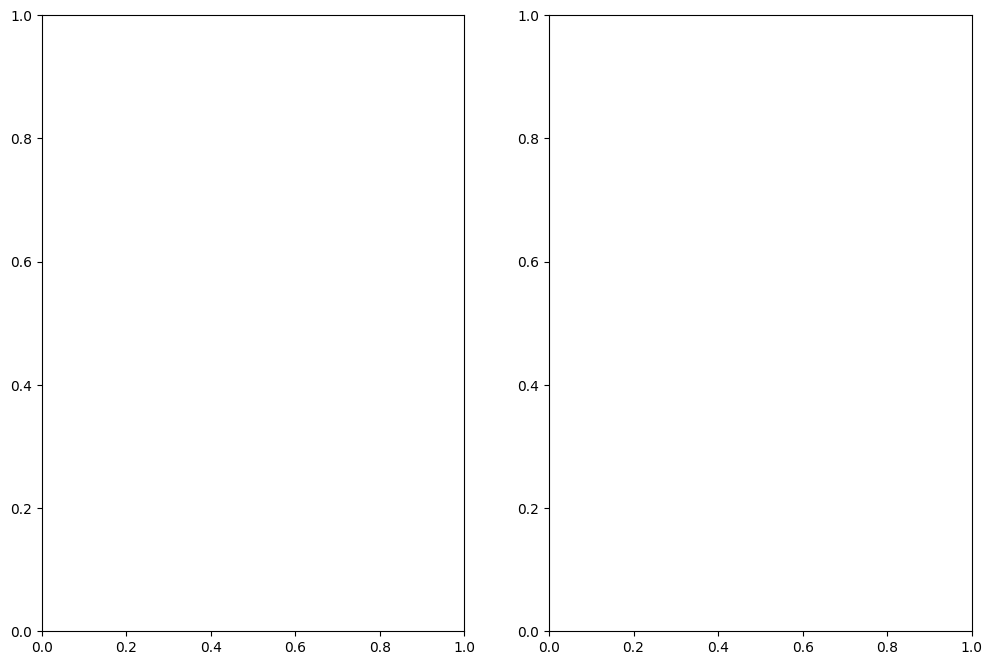

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(12,8))
ax[0].imshow(image, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(noisy_image, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Salt & Pepper Noisy Image')


In [ ]:
#Apply Median Filter To Remove Salt&Pepper Noise
from skimage.color import rgb2gray
filter_size = 3

# Convert noisy_image to grayscale if it's a color image
if noisy_image.ndim == 3:
    # Fix RGBA → RGB if necessary
    if noisy_image.shape[2] == 4:
        noisy_image = noisy_image[:, :, :3]
    # Convert to grayscale
    noisy_image = rgb2gray(noisy_image)
    noisy_image = img_as_ubyte(noisy_image)

# Get dimensions after ensuring grayscale
h, w = noisy_image.shape

# Padding
pad = filter_size // 2
padded_h = h + 2 * pad
padded_w = w + 2 * pad
padded = np.zeros((padded_h, padded_w), dtype=np.float32)
padded[pad:pad+h, pad:pad+w] = noisy_image

#  Prepare the new matrix
restored_img = np.zeros_like(noisy_image)

# ---------------------------
#  Apply the filter to each pixel
# ---------------------------
for i in range(h):
    for j in range(w):
        window = padded[i:i+filter_size, j:j+filter_size]
        median_value = np.median(window)
        restored_img[i, j] = median_value

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(noisy_image, cmap='gray'); ax[0].set_title('Noisy Image'); ax[0].axis('off')
ax[1].imshow(restored_img, cmap='gray'); ax[1].set_title('Image Restoration'); ax[1].axis('off')
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].imshow(image, cmap='gray'); ax[0].set_title('Original Image'); ax[0].axis('off')
ax[1].imshow(noisy_image, cmap='gray'); ax[1].set_title('Noisy Image'); ax[1].axis('off')
ax[2].imshow(restored_img, cmap='gray'); ax[2].set_title('Image Restoration'); ax[2].axis('off')
plt.show()

In [ ]:
# Convert the original image to grayscale for SNR calculation to match restored_img's dimensions
# Ensure `image` is grayscale for comparison if it's currently RGB
if image.ndim == 3:
    # Assuming image is RGB, convert to grayscale. rgb2gray returns float [0,1], convert to uint8 then float32.
    original_snr = img_as_ubyte(rgb2gray(image)).astype(np.float32)
else:
    original_snr = image.astype(np.float32)

restored = restored_img.astype(np.float32)

num = np.sum(original_snr * original_snr)
den = np.sum((original_snr - restored)**2)

# Add a check to prevent division by zero or log of zero if den is very small
if den == 0:
    print("Denominator is zero, cannot calculate SNR (perfect match or no noise).")
else:
    snr_value = 10 * np.log10(num / den)
    print("SNR =", snr_value)


task5


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_name = "/content/WhatsApp Image 2025-12-12 at 14.23.49_773caa36.jpg"

img = cv2.imread(image_name)
if img is None:
    print("لم أجد الصورة!")
else:

  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title("Original")
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(img_gray, cmap='gray')
  plt.title("Gray")
  plt.axis('off')
  plt.show()

In [ ]:
if img is not None:
    # Kernel for operations
    kernel = np.ones((5,5), np.uint8)

    # Dilation
    dilated = cv2.dilate(img_gray, kernel, iterations=1)

    # Erosion
    eroded = cv2.erode(img_gray, kernel, iterations=1)

    # Opening
    opened = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)

    # Closing
    closed = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)

    # Show results
    results = [img_gray, dilated, eroded, opened, closed]
    titles = ['Original', 'Dilation', 'Erosion', 'Opening', 'Closing']

    plt.figure(figsize=(15,8))
    for i in range(5):
        plt.subplot(2,3,i+1)
        plt.imshow(results[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [ ]:
if img is not None:
    # Otsu's method
    _, otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Adaptive method
    adaptive = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

    # Show results
    results = [img_gray, otsu, adaptive]
    titles = ['Original', 'Otsu', 'Adaptive']

    plt.figure(figsize=(12,8))
    for i in range(len(results)): # Loop iterates based on the number of items in 'results'
        plt.subplot(1, len(results), i+1) # Adjusted subplot to display all images in one row
        plt.imshow(results[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [ ]:
if img is not None:
    # 1. Simple Threshold Dithering
    _, simple_dither = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

    # 2. Floyd-Steinberg Dithering (Simpler implementation)
    h, w = img_gray.shape
    fs_dither = img_gray.copy().astype(float) / 255

    for y in range(h-1):
        for x in range(w-1):
            old = fs_dither[y, x]
            new = 0 if old < 0.5 else 1
            fs_dither[y, x] = new
            error = old - new

            fs_dither[y, x+1] += error * 7/16
            fs_dither[y+1, x-1] += error * 3/16
            fs_dither[y+1, x] += error * 5/16
            fs_dither[y+1, x+1] += error * 1/16

    fs_dither = (np.clip(fs_dither, 0, 1) * 255).astype(np.uint8)

    # Show only 2 results
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(simple_dither, cmap='gray')
    plt.title("Simple Dither")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(fs_dither, cmap='gray')
    plt.title("Floyd-Steinberg")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


GUI TEST

In [ ]:
# =========================================================================
# 1. IMPORTS
# =========================================================================
from IPython.display import display, clear_output
import ipywidgets as widgets
from skimage import io, color, exposure, filters, morphology
from skimage.transform import resize
from scipy.signal import convolve2d
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import random

# =========================================================================
# 2. CORE IMAGE PROCESSING FUNCTIONS (FIXED NOISE & UTILITIES)
# =========================================================================

# --- Helper functions for scaling/checking ---
def _scale_to_255_if_needed(image):
    """Scales a float image (0-1) to float (0-255) or returns original if uint8."""
    if image is None: return None
    if image.dtype != np.uint8 and np.max(image) <= 1.0 and np.min(image) >= 0.0:
        return (image * 255.0).astype(float)
    return image.astype(float) # Ensure float type for arithmetic

def _ensure_uint8_255(image):
    """Ensures the image is in displayable uint8 (0-255) format."""
    if image is None: return None # FIX: Handle NoneType input to prevent crash
    if image.dtype == np.uint8: return image
    # Scale float image to 0-255
    return np.clip((image * 255.0), 0, 255).astype(np.uint8)

# --- 2.1 Basic Operations ---

def convert_to_grayscale(rgb_img):
    """Converts an RGB image to grayscale."""
    if rgb_img.ndim == 3 and rgb_img.shape[2] == 4:
        rgb_img = rgb_img[:, :, :3]
    if rgb_img.ndim == 3:
        # Output is float64 in range [0.0, 1.0]
        return color.rgb2gray(rgb_img)
    return rgb_img

def adjust_brightness(image, constant, mode):
    """Adjusts brightness using addition or multiplication."""
    img_float = _scale_to_255_if_needed(image)

    if mode == 'Addition':
        processed_img = img_float + constant
    elif mode == 'Multiplication':
        processed_img = img_float * constant

    return np.clip(processed_img, 0, 255).astype(np.uint8)

def adjust_darkness(image, constant, mode):
    """Adjusts darkness using subtraction or division."""
    img_float = _scale_to_255_if_needed(image)

    if mode == 'Subtraction':
        processed_img = img_float - constant
    elif mode == 'Division':
        C = max(1.0, constant)
        processed_img = img_float / C

    return np.clip(processed_img, 0, 255).astype(np.uint8)

def add_two_images(img1, img2):
    """Adds two images after resizing and ensuring they are in 0-255 scale."""
    img1_float = _scale_to_255_if_needed(img1)
    img2_float = _scale_to_255_if_needed(img2)

    if img1_float.shape != img2_float.shape:
        img2_resized = resize(img2_float, img1_float.shape, anti_aliasing=True, preserve_range=True)
    else:
        img2_resized = img2_float

    result = np.clip(img1_float + img2_resized, 0, 255)
    return result.astype(np.uint8)

def subtract_two_images(img1, img2):
    """Subtracts two images after resizing and ensuring they are in 0-255 scale."""
    img1_float = _scale_to_255_if_needed(img1)
    img2_float = _scale_to_255_if_needed(img2)

    if img1_float.shape != img2_float.shape:
        img2_resized = resize(img2_float, img1_float.shape, anti_aliasing=True, preserve_range=True)
    else:
        img2_resized = img2_float

    result = np.clip(img1_float - img2_resized, 0, 255)
    return result.astype(np.uint8)

# --- 2.2 Histogram Operations ---

def histogram_stretching(image, low, high):
    """Applies min-max histogram stretching."""
    return exposure.rescale_intensity(image, in_range=(low, high), out_range='dtype').astype(np.uint8)

def histogram_equalization(image):
    """Applies histogram equalization."""
    if image.ndim == 3:
        img_hsv = color.rgb2hsv(image)
        img_hsv[:, :, 2] = exposure.equalize_hist(img_hsv[:, :, 2])
        return np.clip((color.hsv2rgb(img_hsv) * 255), 0, 255).astype(np.uint8)
    else:
        return np.clip((exposure.equalize_hist(image) * 255), 0, 255).astype(np.uint8)


# --- 2.3 Spatial Filters ---
# Filters ensure 0-255 uint8 input via _ensure_uint8_255 helper

def apply_mean_filter(image, size=3, padding=True):
    image_uint8 = _ensure_uint8_255(image)
    kernel = np.ones((size, size), dtype=np.float32) / (size * size)
    mode = 'same' if padding else 'valid'
    return convolve2d(image_uint8, kernel, mode=mode, boundary='symm').astype(np.uint8)

def apply_median_filter(image, size=3):
    image_uint8 = _ensure_uint8_255(image)
    return ndimage.median_filter(image_uint8, size=size)

def apply_min_filter(image, size=3):
    image_uint8 = _ensure_uint8_255(image)
    return ndimage.minimum_filter(image_uint8, size=size)

def apply_max_filter(image, size=3):
    image_uint8 = _ensure_uint8_255(image)
    return ndimage.maximum_filter(image_uint8, size=size)

def apply_mode_filter(image, size=3):
    image_uint8 = _ensure_uint8_255(image)
    return ndimage.rank_filter(image_uint8, rank=size*size//2, size=size)

def apply_range_filter(image, size=3):
    image_uint8 = _ensure_uint8_255(image)
    img_max = ndimage.maximum_filter(image_uint8, size=size)
    img_min = ndimage.minimum_filter(image_uint8, size=size)
    return (img_max - img_min).astype(np.uint8)

def apply_gaussian_smoothing_filter(image, size, sigma):
    image_uint8 = _ensure_uint8_255(image)
    return ndimage.gaussian_filter(image_uint8, sigma=sigma, order=0, mode='constant', cval=0, truncate=size/2.0).astype(np.uint8)

def apply_laplacian_filter(image):
    image_uint8 = _ensure_uint8_255(image)
    laplacian_kernel = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])
    edges = convolve2d(image_uint8, laplacian_kernel, mode='same', boundary='symm')
    return np.clip(edges, 0, 255).astype(np.uint8)

# --- 2.4 Noise Operations (FIXED) ---

def add_salt_and_pepper_noise(image, ratio):
    """Adds salt and pepper noise, ensuring 0-255 scale."""
    img_scaled = _ensure_uint8_255(image)
    if img_scaled is None: return None

    noisy_image = img_scaled.copy()
    total_pixels = noisy_image.size
    num_noisy_pixels = int(ratio * total_pixels)

    row, col = noisy_image.shape

    coords_salt = [np.random.randint(0, row, num_noisy_pixels // 2), np.random.randint(0, col, num_noisy_pixels // 2)]
    noisy_image[coords_salt[0], coords_salt[1]] = 255

    coords_pepper = [np.random.randint(0, row, num_noisy_pixels // 2), np.random.randint(0, col, num_noisy_pixels // 2)]
    noisy_image[coords_pepper[0], coords_pepper[1]] = 0

    return noisy_image

def add_gaussian_noise(image, sigma):
    """Adds Gaussian noise, ensuring 0-255 scale."""
    image_scaled = _scale_to_255_if_needed(image) # Returns float 0-255
    if image_scaled is None: return None

    noise = np.random.normal(0, sigma, image_scaled.shape)
    noisy_image = image_scaled + noise

    return np.clip(noisy_image, 0, 255).astype(np.uint8)



# --- 2.5 Morphology, Segmentation & Dithering ---
# These operations ensure 0-255 uint8 input via _ensure_uint8_255 helper

def apply_morphology(image, operation, size):
    image_uint8 = _ensure_uint8_255(image)
    if image_uint8 is None: return None
    selem = morphology.disk(size)

    if operation == 'Dilation':
        return morphology.dilation(image_uint8, selem)
    elif operation == 'Erosion':
        return morphology.erosion(image_uint8, selem)
    elif operation == 'Opening':
        return morphology.opening(image_uint8, selem)
    elif operation == 'Closing':
        return morphology.closing(image_uint8, selem)
    return image_uint8

def automatic_thresholding(image):
    image_uint8 = _ensure_uint8_255(image)
    if image_uint8 is None: return None
    thresh = filters.threshold_otsu(image_uint8)
    binary_image = (image_uint8 > thresh).astype(np.uint8) * 255
    return binary_image

def apply_dithering(image):
    image_uint8 = _ensure_uint8_255(image)
    if image_uint8 is None: return None
    dith_image = image_uint8.copy().astype(float)
    dith_image = dith_image / 255.0

    M = np.array([[0, 2], [3, 1]]) / 4.0

    rows, cols = dith_image.shape
    tiled_matrix = np.tile(M, (rows // M.shape[0] + 1, cols // M.shape[1] + 1))[:rows, :cols]

    result = (dith_image + tiled_matrix) > 1.0
    return (result * 255).astype(np.uint8)


# =========================================================================
# 3. GUI CLASS
# =========================================================================

class ImageProcessorGUI:
    def __init__(self):
        self.img1 = None # Primary image (Original uint8 copy)
        self.img2 = None # Secondary image (Original uint8 copy)
        self.current_image = None # Image currently being processed (can be float [0, 1] or uint8 [0, 255])
        self.is_grayscale = False

        # --- 3.1 Widgets ---
        self.upload_1 = widgets.FileUpload(accept='image/*', multiple=False, description='Upload Image 1', layout=widgets.Layout(width='auto'))
        self.upload_2 = widgets.FileUpload(accept='image/*', multiple=False, description='Upload Image 2', layout=widgets.Layout(width='auto'))
        self.upload_1.observe(self.handle_upload_1, names='value')
        self.upload_2.observe(self.handle_upload_2, names='value')

        self.output_area = widgets.Output()

        # --- 3.2 Parameter Inputs (Combined Panel) ---
        self.const_input = widgets.FloatText(value=50.0, description='Constant (C):', disabled=True)
        self.low_input = widgets.IntSlider(value=2, min=0, max=100, step=1, description='Low Percent:', disabled=True)
        self.high_input = widgets.IntSlider(value=98, min=0, max=100, step=1, description='High Percent:', disabled=True)
        self.filter_size_input = widgets.IntText(value=3, description='Filter/Kernel Size:', disabled=True)
        self.sigma_input = widgets.FloatText(value=2.0, description='Sigma (Gaussian/Noise):', disabled=True)
        self.noise_ratio_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='Noise Ratio/Freq:', disabled=True)

        self.parameter_panel = widgets.VBox([
            widgets.Label(value="Parameters (Adjust before clicking operation):"),
            self.const_input,
            self.low_input,
            self.high_input,
            self.filter_size_input,
            self.sigma_input,
            self.noise_ratio_slider
        ])

        # --- 3.3 Operation Buttons ---
        self.ops = {
            # Group 1: I/O, Basic Point Ops, Arithmetic
            'Convert to Grayscale': {'func': self.apply_grayscale, 'params': []},
            'Brightness (Addition)': {'func': self.apply_brightness, 'mode': 'Addition', 'params': ['const_input']},
            'Brightness (Multiplication)': {'func': self.apply_brightness, 'mode': 'Multiplication', 'params': ['const_input']},
            'Darkness (Subtraction)': {'func': self.apply_darkness, 'mode': 'Subtraction', 'params': ['const_input']},
            'Darkness (Division)': {'func': self.apply_darkness, 'mode': 'Division', 'params': ['const_input']},
            'Add Two Images': {'func': self.apply_arithmetic, 'op': 'Add', 'params': []},
            'Subtract Two Images': {'func': self.apply_arithmetic, 'op': 'Subtract', 'params': []},
            # Group 2: Histograms, Simple Filters
            'Image Histogram': {'func': self.show_histogram, 'params': []},
            'Histogram Stretching': {'func': self.apply_hist_stretch, 'params': ['low_input', 'high_input']},
            'Histogram Equalization': {'func': self.apply_hist_equalization, 'params': []},
            'Mean Filter': {'func': self.apply_filter, 'op': 'Mean', 'params': ['filter_size_input']},
            'Median Filter': {'func': self.apply_filter, 'op': 'Median', 'params': ['filter_size_input']},
            'Min Filter': {'func': self.apply_filter, 'op': 'Min', 'params': ['filter_size_input']},
            'Max Filter': {'func': self.apply_filter, 'op': 'Max', 'params': ['filter_size_input']},
            # Group 3: Advanced Filters, Noise
            'Mode Filter': {'func': self.apply_filter, 'op': 'Mode', 'params': ['filter_size_input']},
            'Range Filter': {'func': self.apply_filter, 'op': 'Range', 'params': ['filter_size_input']},
            'Averaging Filter': {'func': self.apply_filter, 'op': 'Average', 'params': ['filter_size_input']},
            'Gaussian Smoothing Filter': {'func': self.apply_filter, 'op': 'Gaussian', 'params': ['filter_size_input', 'sigma_input']},
            'Laplacian Filter': {'func': self.apply_filter, 'op': 'Laplacian', 'params': []},
            'Salt & Pepper Noise': {'func': self.apply_noise, 'op': 'SP', 'params': ['noise_ratio_slider']},
            'Gaussian Noise': {'func': self.apply_noise, 'op': 'Gaussian', 'params': ['sigma_input']},
            # Group 4: Morphology, Segmentation, Dithering
            'Dilation': {'func': self.apply_morphology_op, 'op': 'Dilation', 'params': ['filter_size_input']},
            'Erosion': {'func': self.apply_morphology_op, 'op': 'Erosion', 'params': ['filter_size_input']},
            'Opening': {'func': self.apply_morphology_op, 'op': 'Opening', 'params': ['filter_size_input']},
            'Closing': {'func': self.apply_morphology_op, 'op': 'Closing', 'params': ['filter_size_input']},
            'Automatic Thresholding': {'func': self.apply_thresholding_op, 'params': []},
            'Dithering': {'func': self.apply_dithering_op, 'params': []},
            'Reset Image 1': {'func': self.reset_image_1, 'params': []}
        }

        button_layout = widgets.Layout(width='auto', height='40px')
        self.operation_buttons = []
        for desc, op_info in self.ops.items():
            button = widgets.Button(description=desc, button_style='info', layout=button_layout, disabled=True)
            button.on_click(self.on_button_click)
            button._op_info = op_info
            self.operation_buttons.append(button)

        button_grid = widgets.GridBox(self.operation_buttons, layout=widgets.Layout(grid_template_columns="repeat(4, 1fr)", padding='10px', grid_gap='5px'))

        # --- 3.4 Final Layout ---
        upload_panel = widgets.HBox([self.upload_1, self.upload_2])
        self.gui = widgets.VBox([
            upload_panel,
            widgets.HBox([self.parameter_panel, widgets.VBox([widgets.Label("Operations:"), button_grid], layout=widgets.Layout(width='70%'))]),
            self.output_area
        ])

    def display_gui(self):
        display(self.gui)

    def _load_image_from_upload(self, upload_widget):
        if not upload_widget.value: return None
        uploaded_file = next(iter(upload_widget.value))
        content = upload_widget.value[uploaded_file]['content']
        file_name = uploaded_file

        try:
            with open(file_name, 'wb') as f:
                f.write(content)

            img = io.imread(file_name)
            if img.ndim == 3 and img.shape[2] == 4:
                img = img[:, :, :3]

            # Ensure image is uint8 (0-255) for consistent storage/reset
            if img.dtype != np.uint8:
                 # Rescale if max is > 1.0 (e.g., loaded as float from a high-bit image)
                 if np.max(img) > 1.0:
                    img = (img / img.max() * 255).astype(np.uint8)
                 # Rescale if max is <= 1.0 (e.g., loaded as float 0-1)
                 else:
                     img = (img * 255).astype(np.uint8)

            return img
        except Exception as e:
             with self.output_area:
                clear_output()
                print(f"Error loading {file_name}: {e}")
             return None

    def handle_upload_1(self, change):
        img = self._load_image_from_upload(self.upload_1)
        if img is not None:
            self.img1 = img
            self.current_image = img.copy()
            self.is_grayscale = (self.current_image.ndim == 2)
            self.display_images(self.img1, self.current_image, "Original Image 1", "Current Image (After Load)")
        self.update_ui_state()

    def handle_upload_2(self, change):
        img = self._load_image_from_upload(self.upload_2)
        if img is not None:
            self.img2 = img
            with self.output_area: clear_output(); print("Image 2 loaded successfully.")
        self.update_ui_state()

    def update_ui_state(self):
        has_img1 = self.img1 is not None
        for button in self.operation_buttons:
            button.disabled = not has_img1

        grayscale_button = next((b for b in self.operation_buttons if b.description == 'Convert to Grayscale'), None)
        if grayscale_button:
            # We allow conversion from RGB to float grayscale, or from float grayscale to uint8 grayscale
            grayscale_button.disabled = self.current_image is None or (self.current_image.ndim == 2 and self.current_image.dtype == np.uint8)

        arithmetic_ops = ['Add Two Images', 'Subtract Two Images']
        has_img2 = self.img2 is not None
        for desc in arithmetic_ops:
            button = next((b for b in self.operation_buttons if b.description == desc), None)
            if button:
                button.disabled = not has_img1 or not has_img2

    def display_images(self, img1, img2, title1, title2, show_hist=False):
        with self.output_area:
            clear_output(wait=True)
            if img1 is None:
                print("Please upload an image first.")
                return

            # FIX: Check if processed image is None due to operation failure
            if img2 is None:
                print(f"Error: Failed to process image for operation '{title2}'. The operation likely failed or returned an empty result.")
                return

            # Ensure images are displayable (scale to uint8 [0-255] if float [0-1])
            img1_display = _ensure_uint8_255(img1)
            img2_display = _ensure_uint8_255(img2)

            if img1_display is None or img2_display is None:
                print("Error: Image data is corrupted or missing after scaling for display.")
                return


            if show_hist:
                fig, ax = plt.subplots(2, 2, figsize=(12, 10))

                # Plot Images
                ax[0, 0].imshow(img1_display, cmap='gray' if img1_display.ndim == 2 else None)
                ax[0, 0].set_title(title1); ax[0, 0].axis('off')
                ax[0, 1].imshow(img2_display, cmap='gray' if img2_display.ndim == 2 else None)
                ax[0, 1].set_title(title2); ax[0, 1].axis('off')

                # Plot Histogram
                if img2_display.ndim == 2:
                    ax[1, 1].hist(img2_display.ravel(), bins=256, range=[0, 256])
                else:
                    colors = ('r', 'g', 'b')
                    for i, col in enumerate(colors):
                        ax[1, 1].hist(img2_display[:, :, i].ravel(), bins=256, range=[0, 256], color=col, alpha=0.6)
                ax[1, 1].set_title(f'Histogram ({title2})')
                ax[1, 0].axis('off')
            else:
                fig, ax = plt.subplots(1, 2, figsize=(12, 5))

                def plot_image(axis, image, title):
                    cmap = 'gray' if image.ndim == 2 else None
                    axis.imshow(image, cmap=cmap)
                    axis.set_title(title, fontsize=12)
                    axis.axis('off')

                plot_image(ax[0], img1_display, title1)
                plot_image(ax[1], img2_display, title2)

            plt.tight_layout()
            plt.show()

    # --- 3.5 Operation Dispatcher ---

    def on_button_click(self, button):
        if self.current_image is None: return

        op_info = button._op_info
        operation = button.description

        all_params = [self.const_input, self.low_input, self.high_input, self.filter_size_input, self.sigma_input, self.noise_ratio_slider]
        for param in all_params: param.disabled = True
        for p_name in op_info.get('params', []):
            widget = getattr(self, p_name)
            widget.disabled = False

        # Check for grayscale requirement for most filters/noise/etc.
        is_grayscale_op = operation in ['Mean Filter', 'Median Filter', 'Min Filter', 'Max Filter', 'Mode Filter', 'Range Filter', 'Averaging Filter', 'Gaussian Smoothing Filter', 'Laplacian Filter', 'Salt & Pepper Noise', 'Gaussian Noise',  'Dilation', 'Erosion', 'Opening', 'Closing', 'Automatic Thresholding', 'Dithering']
        if is_grayscale_op and self.current_image.ndim == 3:
             with self.output_area: clear_output(); print(f"Error: Operation '{operation}' requires a grayscale image. Please convert first (Convert to Grayscale).")
             return

        processed_image = None

        try:
            if operation == 'Reset Image 1':
                processed_image = self.reset_image_1()
                self.display_images(self.img1, processed_image, "Original", "Image Reset")

            elif operation == 'Convert to Grayscale':
                # Returns float [0, 1] if RGB, or uint8 if already uint8 gray
                processed_image = self.apply_grayscale()
                self.display_images(self.img1, processed_image, "Original", "Grayscale Image")

            elif 'Brightness' in operation or 'Darkness' in operation:
                C = self.const_input.value
                mode = op_info['mode']
                if 'Brightness' in operation: processed_image = self.apply_brightness(C, mode)
                else: processed_image = self.apply_darkness(C, mode)
                self.display_images(self.img1, processed_image, "Original", f"{operation} (C={C})")

            elif op_info.get('op') in ['Add', 'Subtract']:
                processed_image = self.apply_arithmetic(op_info['op'])
                self.display_images(self.img1, processed_image, "Image 1", f"{op_info['op']} Image 2")

            elif operation == 'Image Histogram':
                 self.show_histogram()
                 return

            elif operation == 'Histogram Stretching':
                low = self.low_input.value
                high = self.high_input.value
                processed_image = self.apply_hist_stretch(low, high)
                self.display_images(self.img1, processed_image, "Original", f"Histogram Stretch ({low}-{high}%)", show_hist=True)

            elif operation == 'Histogram Equalization':
                processed_image = self.apply_hist_equalization()
                self.display_images(self.img1, processed_image, "Original", f"Histogram Equalization", show_hist=True)

            elif 'Filter' in operation:
                size = self.filter_size_input.value
                sigma = self.sigma_input.value
                op = op_info['op']
                processed_image = self.apply_filter_internal(op, size, sigma)
                self.display_images(self.img1, processed_image, "Original", f"{op} Filter (Size: {size}, Sigma: {sigma})")

            elif 'Noise' in operation:
                op = op_info['op']
                ratio = self.noise_ratio_slider.value
                sigma = self.sigma_input.value
                amplitude = self.const_input.value
                processed_image = self.apply_noise_internal(op, ratio, sigma, amplitude)
                self.display_images(self.img1, processed_image, "Original", f"{op} Noise (Ratio/Freq: {ratio}, Sigma: {sigma})")

            elif op_info.get('op') in ['Dilation', 'Erosion', 'Opening', 'Closing']:
                size = self.filter_size_input.value
                op = op_info['op']
                processed_image = self.apply_morphology_op_internal(op, size)
                self.display_images(self.img1, processed_image, "Original", f"{op} (Size: {size})")

            elif operation == 'Automatic Thresholding':
                processed_image = self.apply_thresholding_op_internal()
                self.display_images(self.img1, processed_image, "Original", "Automatic Thresholding (Otsu)")

            elif operation == 'Dithering':
                processed_image = self.apply_dithering_op_internal()
                self.display_images(self.img1, processed_image, "Original", "Dithering")


            # Update current image state and UI if an image was processed and is not None
            if processed_image is not None:
                self.current_image = processed_image
                self.is_grayscale = (self.current_image.ndim == 2)
                self.update_ui_state()

        except Exception as e:
            with self.output_area:
                clear_output()
                print(f"An error occurred during operation '{operation}': {e}")

    # --- 3.6 Internal Operation Callbacks / Wrappers ---

    # Placeholder Wrappers
    def apply_filter(self, *args, **kwargs): pass
    def apply_noise(self, *args, **kwargs): pass
    def apply_morphology_op(self, *args, **kwargs): pass
    def apply_thresholding_op(self, *args, **kwargs): pass
    def apply_dithering_op(self, *args, **kwargs): pass


    def reset_image_1(self):
        self.current_image = self.img1.copy()
        self.is_grayscale = (self.current_image.ndim == 2)
        return self.current_image

    def apply_grayscale(self):
        # convert_to_grayscale outputs float [0, 1] if input is RGB
        return convert_to_grayscale(self.current_image)

    def apply_brightness(self, C, mode):
        return adjust_brightness(self.current_image, C, mode)

    def apply_darkness(self, C, mode):
        return adjust_darkness(self.current_image, C, mode)

    def apply_arithmetic(self, op):
        if self.img1 is None or self.img2 is None:
            raise ValueError("Both Image 1 and Image 2 must be loaded for arithmetic operations.")

        if op == 'Add':
            return add_two_images(self.img1, self.img2)
        elif op == 'Subtract':
            return subtract_two_images(self.img1, self.img2)

    def show_histogram(self):
        self.display_images(self.img1, self.current_image, "Original Image", "Current Image", show_hist=True)
        return self.current_image

    def apply_hist_stretch(self, low, high):
        return histogram_stretching(self.current_image, low, high)

    def apply_hist_equalization(self):
        return histogram_equalization(self.current_image)

    def apply_filter_internal(self, op, size, sigma):
        if op == 'Mean' or op == 'Averaging':
            return apply_mean_filter(self.current_image, size=size)
        elif op == 'Median':
            return apply_median_filter(self.current_image, size=size)
        elif op == 'Min':
            return apply_min_filter(self.current_image, size=size)
        elif op == 'Max':
            return apply_max_filter(self.current_image, size=size)
        elif op == 'Mode':
            return apply_mode_filter(self.current_image, size=size)
        elif op == 'Range':
            return apply_range_filter(self.current_image, size=size)
        elif op == 'Gaussian':
            return apply_gaussian_smoothing_filter(self.current_image, size, sigma)
        elif op == 'Laplacian':
            return apply_laplacian_filter(self.current_image)

    def apply_noise_internal(self, op, ratio, sigma, amplitude):
        if op == 'SP':
            return add_salt_and_pepper_noise(self.current_image, ratio)
        elif op == 'Gaussian':
            return add_gaussian_noise(self.current_image, sigma)

    def apply_morphology_op_internal(self, op, size):
        return apply_morphology(self.current_image, op, size)

    def apply_thresholding_op_internal(self):
        return automatic_thresholding(self.current_image)

    def apply_dithering_op_internal(self):
        return apply_dithering(self.current_image)


# =========================================================================
# 4. RUN THE GUI
# =========================================================================
gui = ImageProcessorGUI()
gui.display_gui()